In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('notebook')
sns.set_style('darkgrid')
sns.set_palette('Spectral')


import os 
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 500)  # Mengatur jumlah maksimum kolom yang ditampilkan pada DataFrame agar dapat menampilkan hingga 500 kolom.
pd.set_option('display.max_rows', 500)     # Mengatur jumlah maksimum baris yang ditampilkan pada DataFrame agar dapat menampilkan hingga 500 baris.
#df


In [2]:
os.listdir()

['.ipynb_checkpoints',
 'Car_sales.csv',
 'porto4 (data_sorted).csv',
 'porto4.ipynb']

In [3]:
#df

In [4]:
df = pd.read_csv('Car_sales.csv')
df.head(5)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [5]:
df.tail(5)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
152,Volvo,V40,3.545,NaN,Passenger,24.4,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.5,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.8,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.5,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357
156,Volvo,S80,18.969,NaN,Passenger,36.0,2.9,201.0,109.9,72.1,189.8,3.600,21.1,24.0,11/14/2011,85.735655


In [6]:
df.shape

(157, 16)

In [7]:
df.columns 

Index(['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [8]:
for dtype, col in (list(zip(df.dtypes, df.columns))):
    if  dtype == 'int64' or dtype == 'float64':
        print(col, dtype)
        print(df[col].min(), df[col].max())
    else:
        print(col, dtype)
        print(df[col].unique)
        
        
print()

Manufacturer object
<bound method Series.unique of 0           Acura
1           Acura
2           Acura
3           Acura
4            Audi
5            Audi
6            Audi
7             BMW
8             BMW
9             BMW
10          Buick
11          Buick
12          Buick
13          Buick
14       Cadillac
15       Cadillac
16       Cadillac
17       Cadillac
18       Cadillac
19      Chevrolet
20      Chevrolet
21      Chevrolet
22      Chevrolet
23      Chevrolet
24      Chevrolet
25      Chevrolet
26      Chevrolet
27      Chevrolet
28       Chrysler
29       Chrysler
30       Chrysler
31       Chrysler
32       Chrysler
33       Chrysler
34       Chrysler
35          Dodge
36          Dodge
37          Dodge
38          Dodge
39          Dodge
40          Dodge
41          Dodge
42          Dodge
43          Dodge
44          Dodge
45          Dodge
46           Ford
47           Ford
48           Ford
49           Ford
50           Ford
51           Ford
52           

In [9]:
df['Latest_Launch '] = pd.to_datetime(df['Latest_Launch'])

<AxesSubplot:>

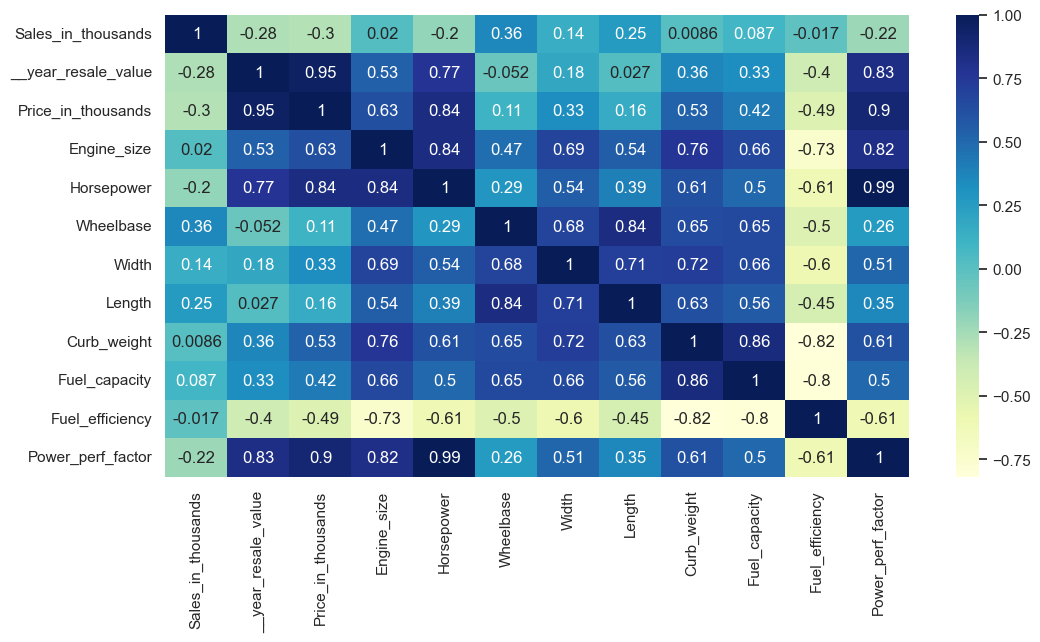

In [10]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [11]:
df = df.drop(columns=['Latest_Launch'])

Duplicated Data

In [12]:
df.duplicated().sum()

0

In [13]:
df.isna().sum().sort_values(ascending=False)

__year_resale_value    36
Fuel_efficiency         3
Price_in_thousands      2
Curb_weight             2
Power_perf_factor       2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Fuel_capacity           1
Manufacturer            0
Model                   0
Sales_in_thousands      0
Vehicle_type            0
Latest_Launch           0
dtype: int64

Outlier Checking

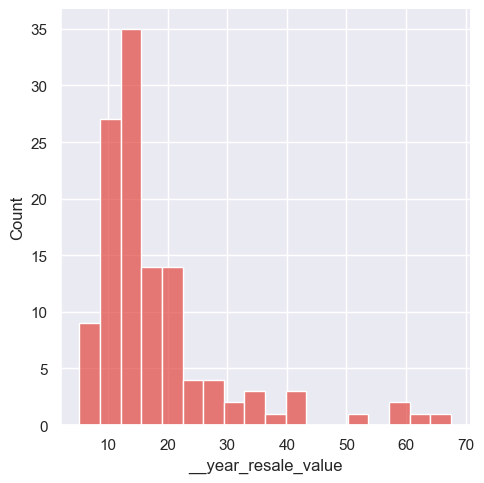

In [14]:
sns.displot(df['__year_resale_value']) 

<AxesSubplot:>

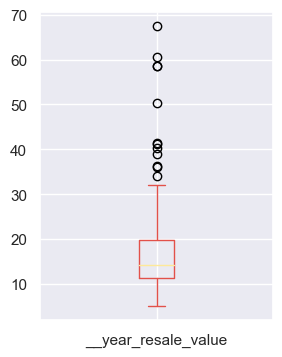

In [15]:
df['__year_resale_value'].plot(kind='box', figsize=(3,4))

In [16]:
df['__year_resale_value'] = df['__year_resale_value'].fillna(
                            df['__year_resale_value'].median())

In [17]:
df.fillna(method='ffill', inplace=True)
df.isna().any().sum()

0

In [18]:
df.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Power_perf_factor', 'Latest_Launch '],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Manufacturer         157 non-null    object        
 1   Model                157 non-null    object        
 2   Sales_in_thousands   157 non-null    float64       
 3   __year_resale_value  157 non-null    float64       
 4   Vehicle_type         157 non-null    object        
 5   Price_in_thousands   157 non-null    float64       
 6   Engine_size          157 non-null    float64       
 7   Horsepower           157 non-null    float64       
 8   Wheelbase            157 non-null    float64       
 9   Width                157 non-null    float64       
 10  Length               157 non-null    float64       
 11  Curb_weight          157 non-null    float64       
 12  Fuel_capacity        157 non-null    float64       
 13  Fuel_efficiency      157 non-null  

In [20]:
df_to_plot = df.select_dtypes(include=('float'))


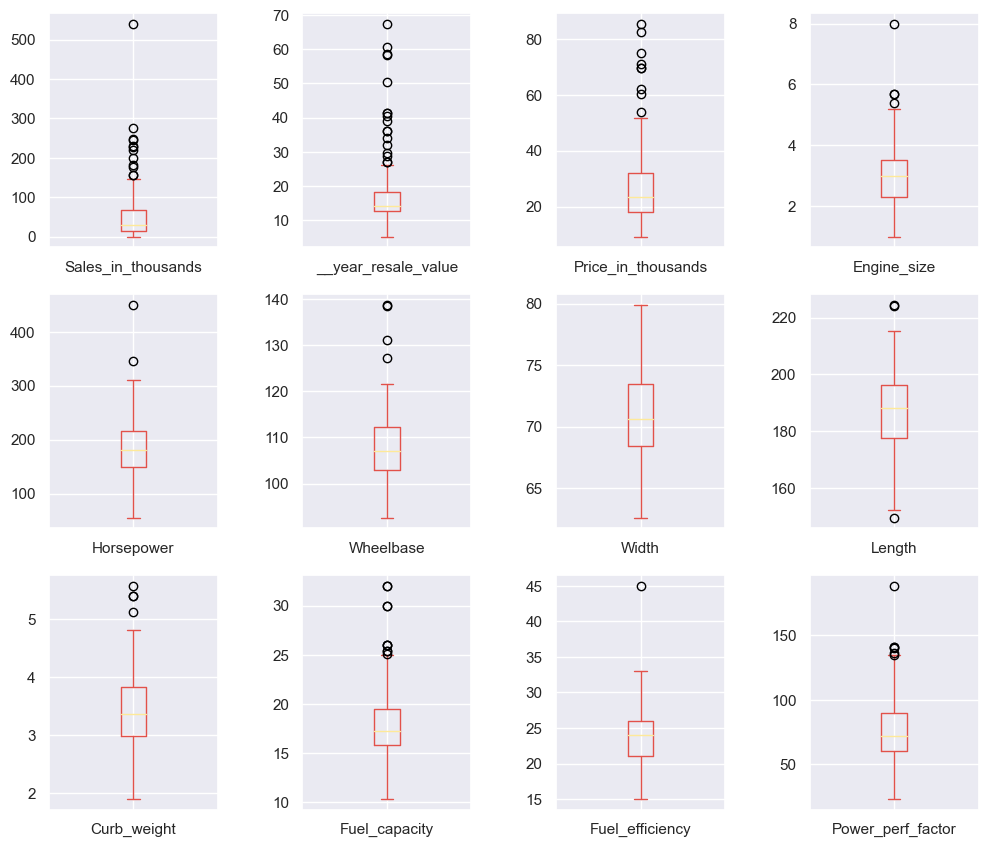

In [21]:
df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14))
plt.subplots_adjust(wspace=0.5)

In [22]:
numeric = df_to_plot.columns
numeric

Index(['Sales_in_thousands', '__year_resale_value', 'Price_in_thousands',
       'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length',
       'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor'],
      dtype='object')

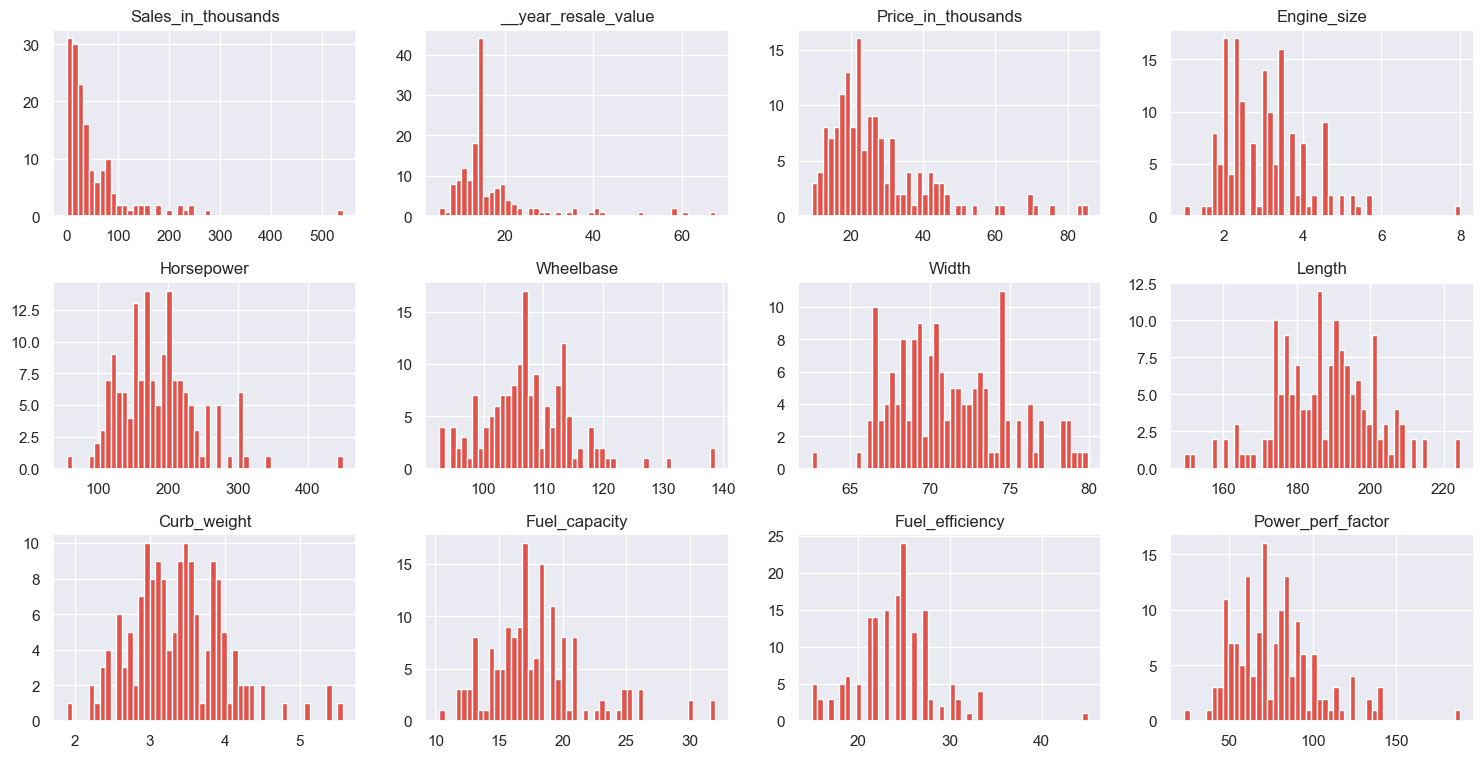

In [23]:
fig = plt.figure(figsize=(15,10))
ax = plt.gca()

df.hist(bins=50, ax=ax, layout=(4,4), column=numeric)
plt.tight_layout()
plt.show()

In [24]:
df.head(5)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Latest_Launch
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150,2012-02-02
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778,2011-06-03
2,Acura,CL,14.114,18.225,Passenger,28.40,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,91.370778,2012-01-04
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779,2011-03-10
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639,2011-10-08


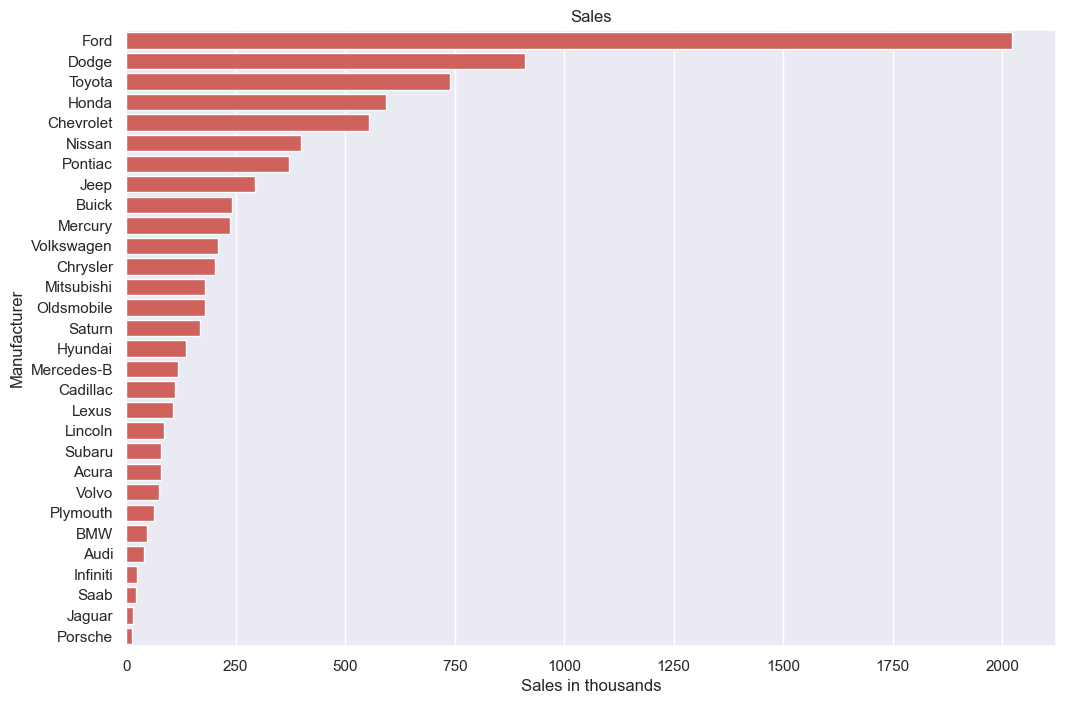

In [25]:
data = df.groupby('Manufacturer')['Sales_in_thousands'].sum().reset_index()
data_sorted = data.sort_values(by='Sales_in_thousands', ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x='Sales_in_thousands', y='Manufacturer', data=data_sorted)
plt.title("Sales")
plt.xlabel('Sales in thousands');

In [26]:
data = df.groupby('Model')[['Manufacturer','Sales_in_thousands']].sum().reset_index()
data_sorted = data.sort_values(by='Sales_in_thousands', ascending=False)
data_sorted.head(10)

,Model,Sales_in_thousands
63,F-Series,540.561
62,Explorer,276.747
31,Camry,247.994
145,Taurus,245.815
12,Accord,230.902
117,Ram Pickup,227.061
120,Ranger,220.650
41,Civic,199.685
32,Caravan,181.749
65,Focus,175.670


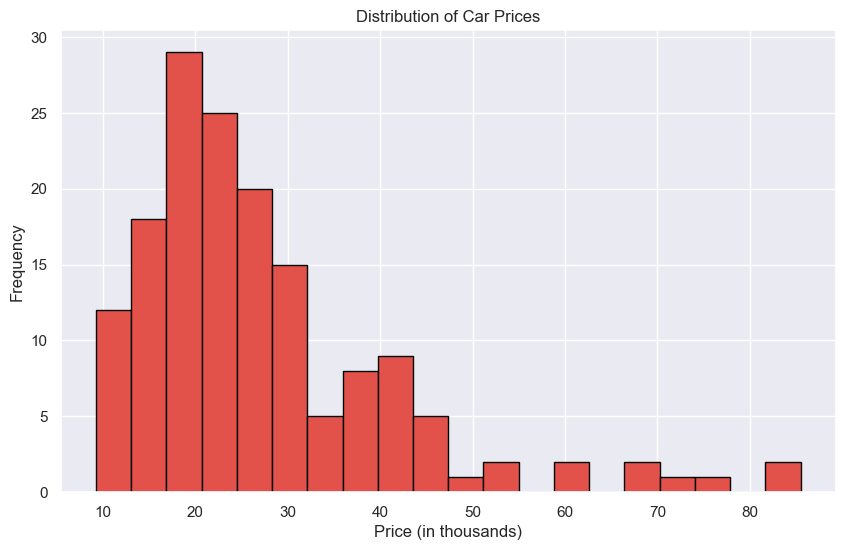

In [27]:
prices = df['Price_in_thousands']

plt.figure(figsize=(10, 6))
plt.hist(prices, bins=20, edgecolor='black')
plt.title('Distribution of Car Prices')
plt.xlabel('Price (in thousands)')
plt.ylabel('Frequency')
plt.show()

6      62.000
39     69.725
73     54.005
74     60.105
94     69.700
95     82.600
99     85.500
125    71.020
126    74.970
Name: Price_in_thousands, dtype: float64


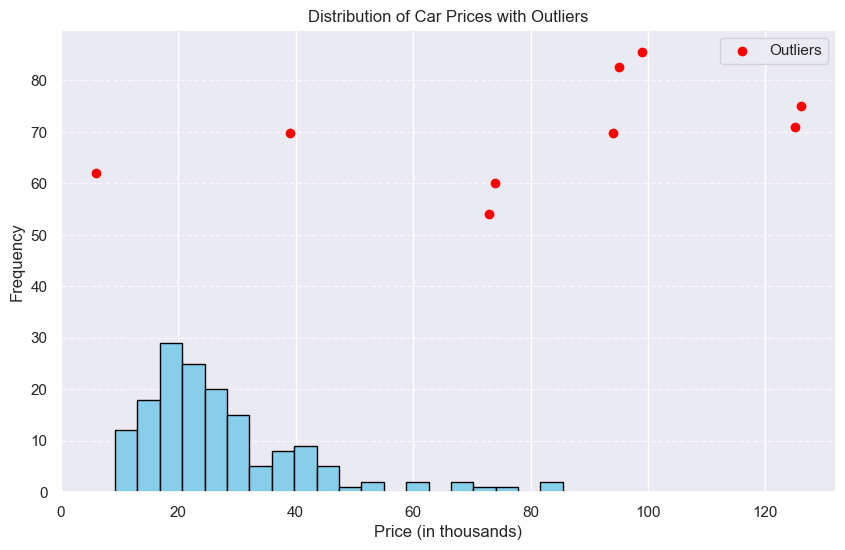

In [28]:
Q1 = prices.quantile(0.25)
Q3 = prices.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = prices[(prices < lower_bound) | (prices > upper_bound)]
print(outliers)

plt.figure(figsize=(10, 6))
plt.hist(prices, bins=20, color='skyblue', edgecolor='black')
plt.scatter(outliers.index, outliers, color='red', label='Outliers')
plt.title('Distribution of Car Prices with Outliers')
plt.xlabel('Price (in thousands)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [29]:
correlation_coefficient = df['Price_in_thousands'].corr(df['__year_resale_value'])
print('Correlation between the initial price and resale value: ' + str(round(correlation_coefficient*100,2))+'%')

Correlation between the initial price and resale value: 78.53%


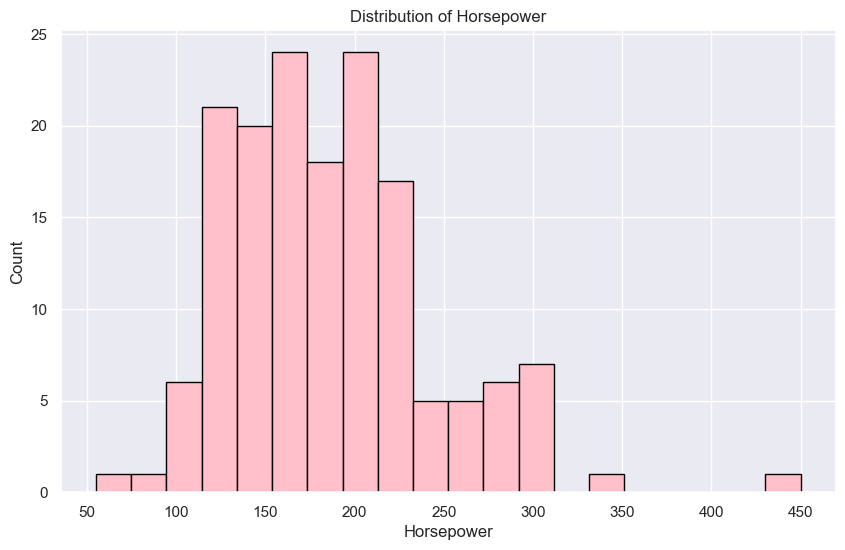

In [30]:
data = df['Horsepower']

plt.figure(figsize=(10,6))
# sns.barplot(x='Horsepower', y='count', data=data)
plt.hist(data, bins=20, color='pink', edgecolor='black')
plt.title("Distribution of Horsepower");
plt.xlabel('Horsepower')
plt.ylabel('Count')
plt.show()

                    Engine_size  Horsepower  Price_in_thousands
Engine_size            1.000000    0.836330            0.626703
Horsepower             0.836330    1.000000            0.835501
Price_in_thousands     0.626703    0.835501            1.000000


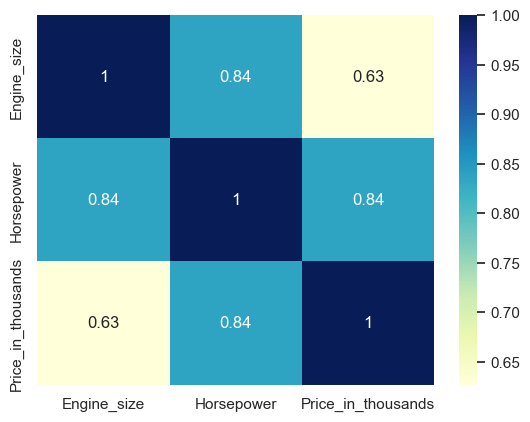

In [31]:
sns.heatmap(df[['Engine_size','Horsepower','Price_in_thousands']].corr(), annot=True, cmap="YlGnBu");
print(df[['Engine_size','Horsepower','Price_in_thousands']].corr())